In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2
#import display clear_output
from IPython.display import clear_output
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
all_diffs = {}
for DATA_DIR in ["data/20211215_kocinka_rybna", "data/20220118_kocinka_rybna", "data/20220325_kocinka_rybna", "data/20221220_sudol_krakow", "data/20230111_kocinka_grodzisko"]:
    TIF_RAW_DIR = f"{DATA_DIR}/tif_raw"
    TIF_DEVIGNETTE_DIR = f"{DATA_DIR}/tif_devignette"
    file_names = os.listdir(TIF_RAW_DIR)
    diffs = []
    for file_name in tqdm(file_names):
        raw_arr = np.array(Image.open(f"{TIF_RAW_DIR}/{file_name}"))
        devignette_arr = np.array(Image.open(f"{TIF_DEVIGNETTE_DIR}/{file_name}"))
        raw_std = np.std(raw_arr)
        devignette_std = np.std(devignette_arr)
        diff = devignette_std - raw_std
        diffs.append(diff)
    all_diffs[DATA_DIR] = np.array(diffs)

100%|██████████| 1211/1211 [01:20<00:00, 14.99it/s]


In [4]:
all_diffs_concat = np.concatenate(list(all_diffs.values()))

In [28]:
#count all_diffs_concat >0
print(f"Percent of images with higher std after devignetting: {np.sum(all_diffs_concat > 0)/len(all_diffs_concat)}")
print(f"Percent of images with lower std after devignetting: {np.sum(all_diffs_concat < 0)/len(all_diffs_concat)}")

Number of images with higher std after devignetting: 0.2555153111623312
Number of images with lower std after devignetting: 0.7444846888376687


In [34]:
np.mean(all_diffs_concat[all_diffs_concat > 0])

0.009252661

In [35]:
np.mean(all_diffs_concat[all_diffs_concat < 0])

-0.06944856

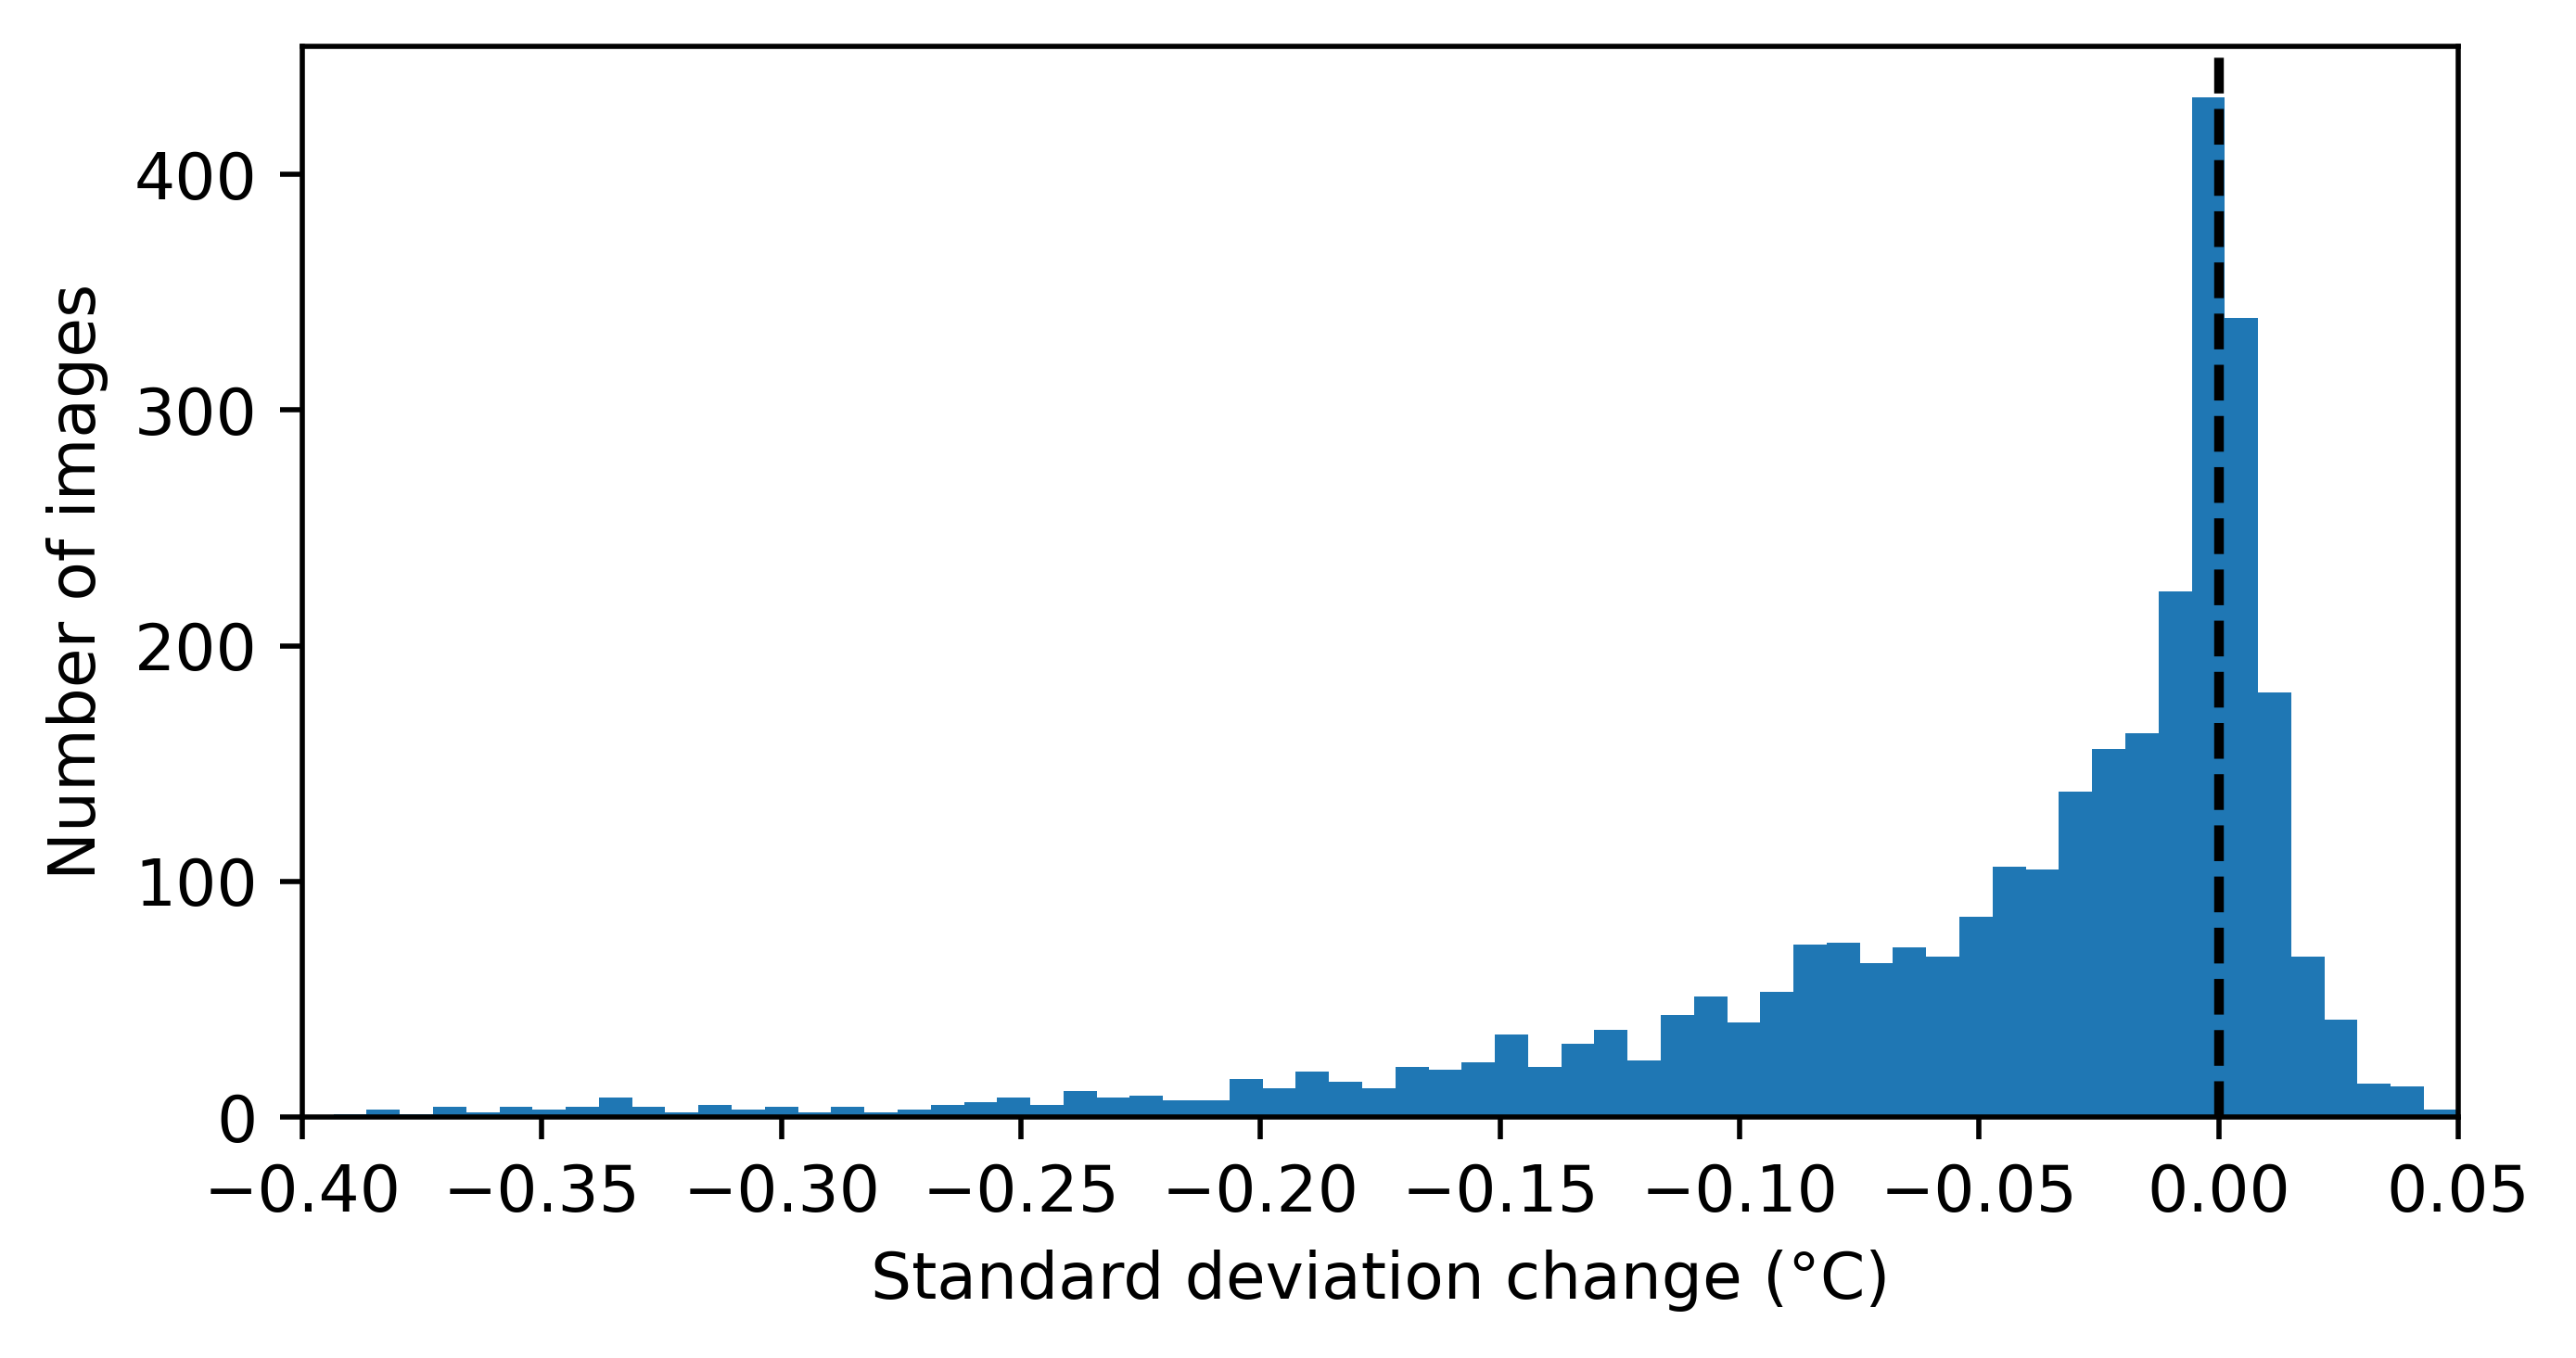

In [25]:
#set dpi to 500
plt.rcParams['figure.dpi'] = 500
plt.figure(figsize=(6, 3))
#plot all diffs
plt.hist(all_diffs_concat, bins=120)
#make vertical line at 0
plt.axvline(x=0, color="black", linestyle="--")
#plt.yscale("log")
#set x min to -0.5
#y label
plt.ylabel("Number of images")
plt.xlabel("Standard deviation change (°C)")
plt.xlim(-0.4, 0.05)
plt.show()
